In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

# Loading the dataset

In [2]:
df = pd.read_csv('open-meteo-subset.csv')

In [3]:
print(f'Shape of the dataset: {df.shape}.')

Shape of the dataset: (8760, 6).


In [4]:
df.dtypes

time                       object
temperature_2m (°C)       float64
precipitation (mm)        float64
wind_speed_10m (m/s)      float64
wind_gusts_10m (m/s)      float64
wind_direction_10m (°)      int64
dtype: object

In [5]:
df.isna().sum()

time                      0
temperature_2m (°C)       0
precipitation (mm)        0
wind_speed_10m (m/s)      0
wind_gusts_10m (m/s)      0
wind_direction_10m (°)    0
dtype: int64

In [6]:
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


We observe that the dataset consists of 6 columns, 1 column containing time and 5 columns containing weather data.   
The temperature, percipitation, wind speed and wind gusts are floats, while wind direction is int.   
There are no nans in the dataset.

Let's plot the distibutions of the columns of the dataset.

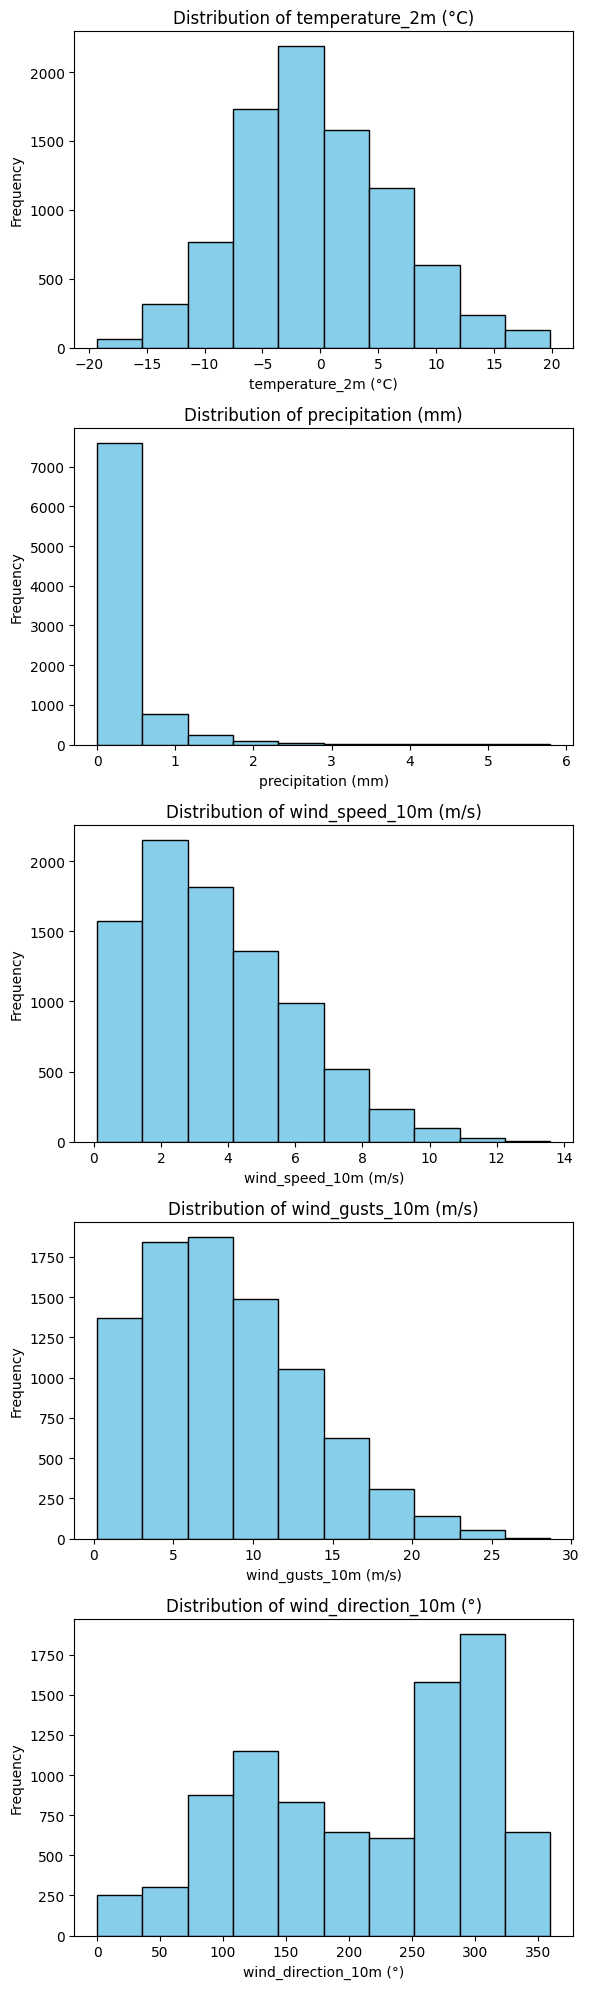

In [7]:
df = df.set_index('time')
n_cols = df.shape[1]
fig, axes = plt.subplots(n_cols, 1, figsize=(6, 4 * n_cols))
for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We observe that the temperature distibution is normally ditributed, percipitation, wind speed and wind gust all have right tails, and the wind direction has a bimodal distribution.

To plot all columns together we will normalize the data using MinMaxScaler from scikitLearn.

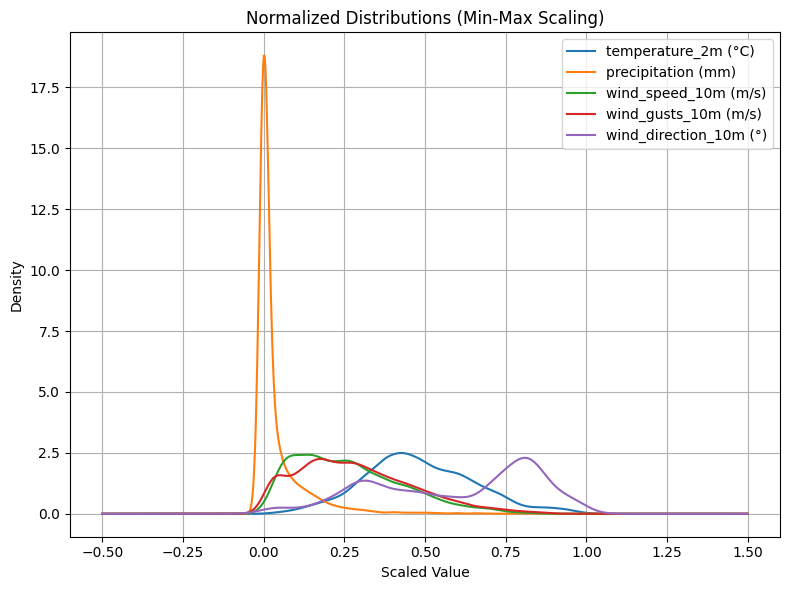

In [8]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Plot all scaled columns as KDEs
plt.figure(figsize=(8, 6))

for col in df_scaled.columns:
    df_scaled[col].plot(kind='kde', label=col)

plt.title('Normalized Distributions (Min-Max Scaling)')
plt.xlabel('Scaled Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Log
The first part of the assignment was pretty straightforward as I have experience in using jupyter notebooks for exploratory data analysis.   

For this part I loaded and inspected the data using pandas. Then made histograms for each column using matplotlib. For plotting all the columns together, I used MinMaxScaler from scikit learn and made a line plot using matplotlib.   
     
The biggest challenge I faced in part one was in creating the pdf, as pandoc was not installed on my system. This was easily fixed as it’s a common problem when creating pdfs from jupyter notebook.   
   
The second part of the assignment was a bit more challenging as I have not used Streamlit before. I started with creating an app only displaying “hello world” in the browser. Then I created multiple pages for the app using a folder structure and added page navigation. I found that the page navigation didn’t work very well with an app with folder structure, so I changed to using functions to define the pages of the app. I then created one python script for each page which I import in the main streamlit_app.py file. For me, this way to structure the app made the most sense. Then I filled the pages with the content as described in the task, spending most time on creating the third page. The last thing I did was to implement the caching of the dataframe. I tried to do this in the streamlit_app.py file but was not able to make this work properly. I then chose to make a script for loading the data with containing a function for loading the csv-file into a dataframe using the @st.caching decorator. I think this will work for caching.   

Use of AI: I used ChatGPT for the for-loop creating plots for the individual plots, and for the tip of using MinMaxScaler. In addition, I used ChatGPT for the altair code in the streamlit app.



### Corrections

I'm not really sure what you meant by your comments.   
Just to note, minmax-scaling is a standard, if not the standard way, to do normalization :)   
Regarding the plot, I'm not sure what you mean needs to be changed. I could have changed the plot kind to hist, instead of kde. But then the pecipitation peak would be way higher. The distribution of the data is what it is.   
I did make a histogram below using plotly, but it's even more difficult to see the distributions here. I guess you could zoom in on different parts of the plot if the notebook wasn't turned into a pdf.   
I also added a line plot of the normalized data if that is what you need, although I don't think doing this adds value to data exploration. If this is not what you need I guess I need to be spoonfed what I need to do :)

In [9]:
fig_all_hist = px.histogram(df_scaled, barmode='overlay', title='Distribution of Normalized Columns')
fig_all_hist.show()

In [10]:
fig = px.line(df_scaled, x=df_scaled.index, y=df_scaled.columns,
              title='Line Plot of Normalized Data',
              labels={'value': 'Normalized Value', 'variable': 'Column'})
fig.show()